In [291]:

import numpy as np 
import pickle
import pandas as pd 
import warnings 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras import regularizers 
import xgboost as xgb 
from sklearn.decomposition import PCA 
from sklearn import tree 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import RobustScaler 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn import metrics 
pd.set_option('display.max_columns', None) 
warnings.filterwarnings('ignore')
%matplotlib inline

In [292]:
# Read Train and Test dataset
train_data = pd.read_csv("KDDTrain+.txt")

In [293]:
# Check data
train_data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


Ce code définit une liste appelée "colonnes" qui contient les noms des différentes caractéristiques présentes dans les données. Chaque nom de colonne correspond à une variable spécifique telle que la durée, le type de protocole, le service, le drapeau, etc. Cela permet de référencer facilement chaque variable lors de l'analyse des données.

In [294]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [295]:
# Assign name for columns
train_data.columns = columns

Ce code affiche les premières lignes du DataFrame "train_data", ce qui permet de visualiser rapidement les premières observations du jeu de données. Cela est utile pour obtenir un aperçu initial des données et vérifier la structure, les types de variables et les valeurs présentes dans le jeu de données d'entraînement.

In [296]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [297]:
#Thông tin dataset  NSL-KDD
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [298]:
#Afficher les statistiques descriptives du jeu de données d'entraînement
train_data.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480801,4021285.112114,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [299]:
# train_data.loc[train_data['outcome'] == "normal", "outcome"] = 'normal'
# train_data.loc[train_data['outcome'] != 'normal', "outcome"] = 'attack'

In [300]:
attack_column = 'outcome'
attack_dict = {
    'normal': 'normal',
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',
    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}
# Ánh xạ nhãn cho từng loại tấn công sử dụng attack_dict
train_data['outcome'] = train_data[attack_column].replace(attack_dict)

In [301]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

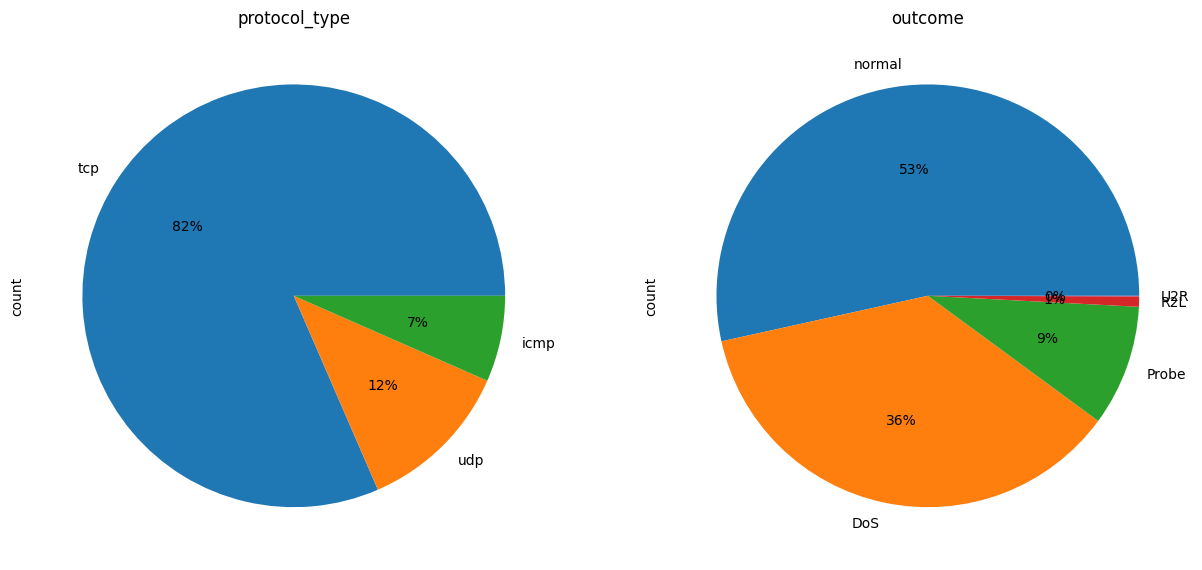

In [302]:
pie_plot(train_data, ['protocol_type', 'outcome'], 1, 2)

Preprocessing the data
Ce code définit une fonction appelée "Scaling" qui prend en paramètres un DataFrame de données numériques "df_num" et une liste de colonnes "cols" à mettre à l'échelle. La fonction utilise l'objet RobustScaler de la bibliothèque scikit-learn pour effectuer la mise à l'échelle robuste des données. Elle applique la transformation aux données numériques du DataFrame "df_num" à l'aide de la méthode "fit_transform" de l'objet scaler. Les données mises à l'échelle sont ensuite stockées dans un nouveau DataFrame "std_df" avec les mêmes colonnes que celles spécifiées dans "cols". Finalement, le DataFrame mis à l'échelle est retourné par la fonction.

In [303]:
def add_missing_features(data, feature_names):
    missing_features = set(feature_names) - set(data.columns)
    for feature in missing_features:
        data[feature] = 0
    return data
# Tiền xử lý dữ liệu

In [304]:
# Fonction pour effectuer une mise à l'échelle des données numériques
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [305]:
def preprocess_data(data):
    # Chuyển đổi các đặc trưng kiểu chuỗi thành dạng số
    cat_cols = ["protocol_type", "service", "flag"]
    encoder = OneHotEncoder(sparse=False)
    encoded_features = pd.DataFrame(encoder.fit_transform(data[cat_cols]))
    feature_names = encoder.get_feature_names_out(cat_cols)
    encoded_features.columns = feature_names

    # Xóa các đặc trưng kiểu chuỗi ban đầu
    data = data.drop(cat_cols, axis=1)

    # Kết hợp các đặc trưng đã mã hóa
    processed_data = pd.concat([data, encoded_features], axis=1)

    # Chuẩn hóa đặc trưng số học
    scaler = StandardScaler()
    processed_data = pd.DataFrame(scaler.fit_transform(processed_data), columns=processed_data.columns)

    # Kiểm tra và thêm các feature thiếu
#     processed_data = add_missing_features(processed_data, feature_names)

    return processed_data

In [306]:
# Xử lý giá trị rời rạc
def discretize_data(data):
    # Các đặc trưng có giá trị rời rạc
    discrete_features = ["land", "logged_in", "root_shell", "su_attempted", "is_host_login", "is_guest_login"]

    # Chuyển đổi các giá trị rời rạc thành chuỗi
    for feature in discrete_features:
        data[feature] = data[feature].astype(str)

    return data

In [307]:
# Tăng cường dữ liệu
def oversample_data(X, y):
    oversampler = RandomOverSampler()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    return X_resampled, y_resampled

In [308]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [309]:
# Prétraitement des données d'entraînement
# scaled_train = preprocess(train_data)

Ce code effectue les étapes suivantes :

-Sélection des variables prédictives en excluant les colonnes 'outcome' et 'level' du DataFrame "scaled_train" et stockage des valeurs dans "x". -Extraction des valeurs de la variable cible 'outcome' du DataFrame "scaled_train" et stockage dans "y". -Extraction des valeurs de la variable cible de régression 'level' du DataFrame "scaled_train" et stockage dans "y_reg". -Réduction de dimension des variables prédictives en utilisant l'analyse en composantes principales (PCA) avec 20 composantes principales. Les valeurs réduites sont stockées dans "x_reduced". -Affichage du nombre de caractéristiques originales dans "x" et du nombre de caractéristiques réduites dans "x_reduced" après l'application de PCA. -Conversion du type de la variable cible "y" en entier. -Séparation des données en ensembles d'entraînement et de test pour la classification, en utilisant une proportion de test de 20% et une graine aléatoire de 42. Les ensembles d'entraînement et de test sont stockés dans "x_train", "x_test", "y_train" et "y_test". -Séparation des données réduites en ensembles d'entraînement et de test pour la classification, en utilisant la même proportion de test et la même graine aléatoire. Les ensembles d'entraînement et de test réduits sont stockés dans "x_train_reduced", "x_test_reduced", "y_train_reduced" et "y_test_reduced". -Séparation des données en ensembles d'entraînement et de test pour la régression, en utilisant la même proportion de test et la même graine aléatoire. Les ensembles d'entraînement et de test pour la régression sont stockés dans "x_train_reg", "x_test_reg", "y_train_reg" et "y_test_reg".

In [310]:
X_train = train_data.drop(['outcome','level'], axis=1)
y_train = train_data["outcome"]

X_train = preprocess_data(X_train)
X_train = discretize_data(X_train)
# X_train, y_train = oversample_data(X_train, y_train)

x, x_test, y, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [311]:
# x = scaled_train.drop(['outcome', 'level'], axis=1).values
# y = scaled_train['outcome'].values
# y_reg = scaled_train['level'].values

# # Sélection des variables prédictives en excluant les colonnes 'outcome' et 'level' du DataFrame "scaled_train"
# # x = scaled_train.drop(['outcome', 'level'], axis=1).values

# # Extraction de la variable cible 'outcome' dans "y"
# # y = scaled_train['outcome'].values


# # Extraction de la variable cible de régression 'level' dans "y_reg"
# y_reg = scaled_train['level'].values

# # Réduction de dimension avec PCA
# pca = PCA(n_components=2)
# pca = pca.fit(x)
# x_reduced = pca.transform(x)
# print(x_reduced.shape[1])



# # Affichage du nombre de caractéristiques originales et réduites après PCA
# print("Le nombre de caractéristiques originales est {} et le nombre de caractéristiques réduites est {}".format(x.shape[1], x_reduced.shape[1]))

# # Conversion du type de la variable cible "y" en entier

# y = y.astype('int')

# # Séparation des données en ensembles d'entraînement et de test pour la classification
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print("x_test",y[0])

# # Séparation des données réduites en ensembles d'entraînement et de test pour la classification
# x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

# # Séparation des données en ensembles d'entraînement et de test pour la régression
# x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

In [312]:
def evaluate_model(model, X, y,x_test,y_test):
    y_pred = model.predict(X)
    y_pred_test = model.predict(x_test)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test= precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    confusion = confusion_matrix(y, y_pred)
    confusion_test = confusion_matrix(y_test, y_pred_test)
    cls_report =classification_report(y_true=y_test,y_pred=y_pred_test,target_names= model.classes_)    
    cls_report_train =classification_report(y_true=y,y_pred=y_pred,target_names= model.classes_)
    print("Training Accuracy:", accuracy)
    print("Training Precision:", precision)
    print("Training Recall:", recall)
    print("Test Accuracy:", accuracy_test)
    print("Test Precision:", precision_test)
    print("Test Recall:", recall_test)
    print("------------------------------")
    print("classification_report-TEST:")
    print(cls_report)
    print("classification_report-TRAIN:")
    print(cls_report_train)

    return accuracy, precision, recall, accuracy_test, precision_test, recall_test,confusion,confusion_test

In [313]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
#     print(1)
#     y_train.loc[y_train['outcome'] == "normal", "outcome"] = 0
#     y_train.loc[y_train['outcome'] != 0, "outcome"] = 1
#     _y_train = []
#     for x in y_train:
#         a = 0
#         if x != 'normal':
#             a = 1
#         _y_train.append(a)

#     _y_test = []
#     for x in y_train:
#         a = 0
#         if x != 'normal':
#             a = 1
#         _y_test.append(a)
# #     y_test.loc[y_test['outcome'] == "normal", "outcome"] = 0
# #     y_test.loc[y_test['outcome'] != 0, "outcome"] = 1
    
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)
    export_model_path = "/kaggle/working/model.pkl"
     # Xuất model nếu được chỉ định đường dẫn
    if export_model_path is not None:
        with open(export_model_path, 'wb') as f:
            pickle.dump(model, f)
        with open(export_model_path, 'rb') as f:
            gnb_loaded= pickle.load(f)
            print("result:", gnb_loaded)
        print("Exported model saved successfully at:", export_model_path)

Naive Bayes
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle. Every pair of features being classified is independent of each other. The assumptions made by Naive Bayes are not generally correct in real-world situations. In-fact, the independence assumption is never correct but often works well in practice.

Now, it is important to know about Bayes’ theorem.

Bayes’ Theorem
Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:



where A and B are events and P(B) ≠ 0.

Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

Training Accuracy: 0.6539190489893527
Training Precision: 0.8541703088884535
Training Recall: 0.6539190489893527
Test Accuracy: 0.6535423695177615
Test Precision: 0.8515553335107198
Test Recall: 0.6535423695177615
------------------------------
classification_report-TEST:
              precision    recall  f1-score   support

         DoS       0.98      0.90      0.94      9224
       Probe       0.95      0.16      0.27      2373
         R2L       0.02      0.50      0.04       199
         U2R       0.01      0.62      0.01        13
      normal       0.76      0.58      0.65     13386

    accuracy                           0.65     25195
   macro avg       0.54      0.55      0.38     25195
weighted avg       0.85      0.65      0.72     25195

classification_report-TRAIN:
              precision    recall  f1-score   support

         DoS       0.99      0.90      0.94     36703
       Probe       0.96      0.15      0.26      9283
         R2L       0.02      0.51      0.04   

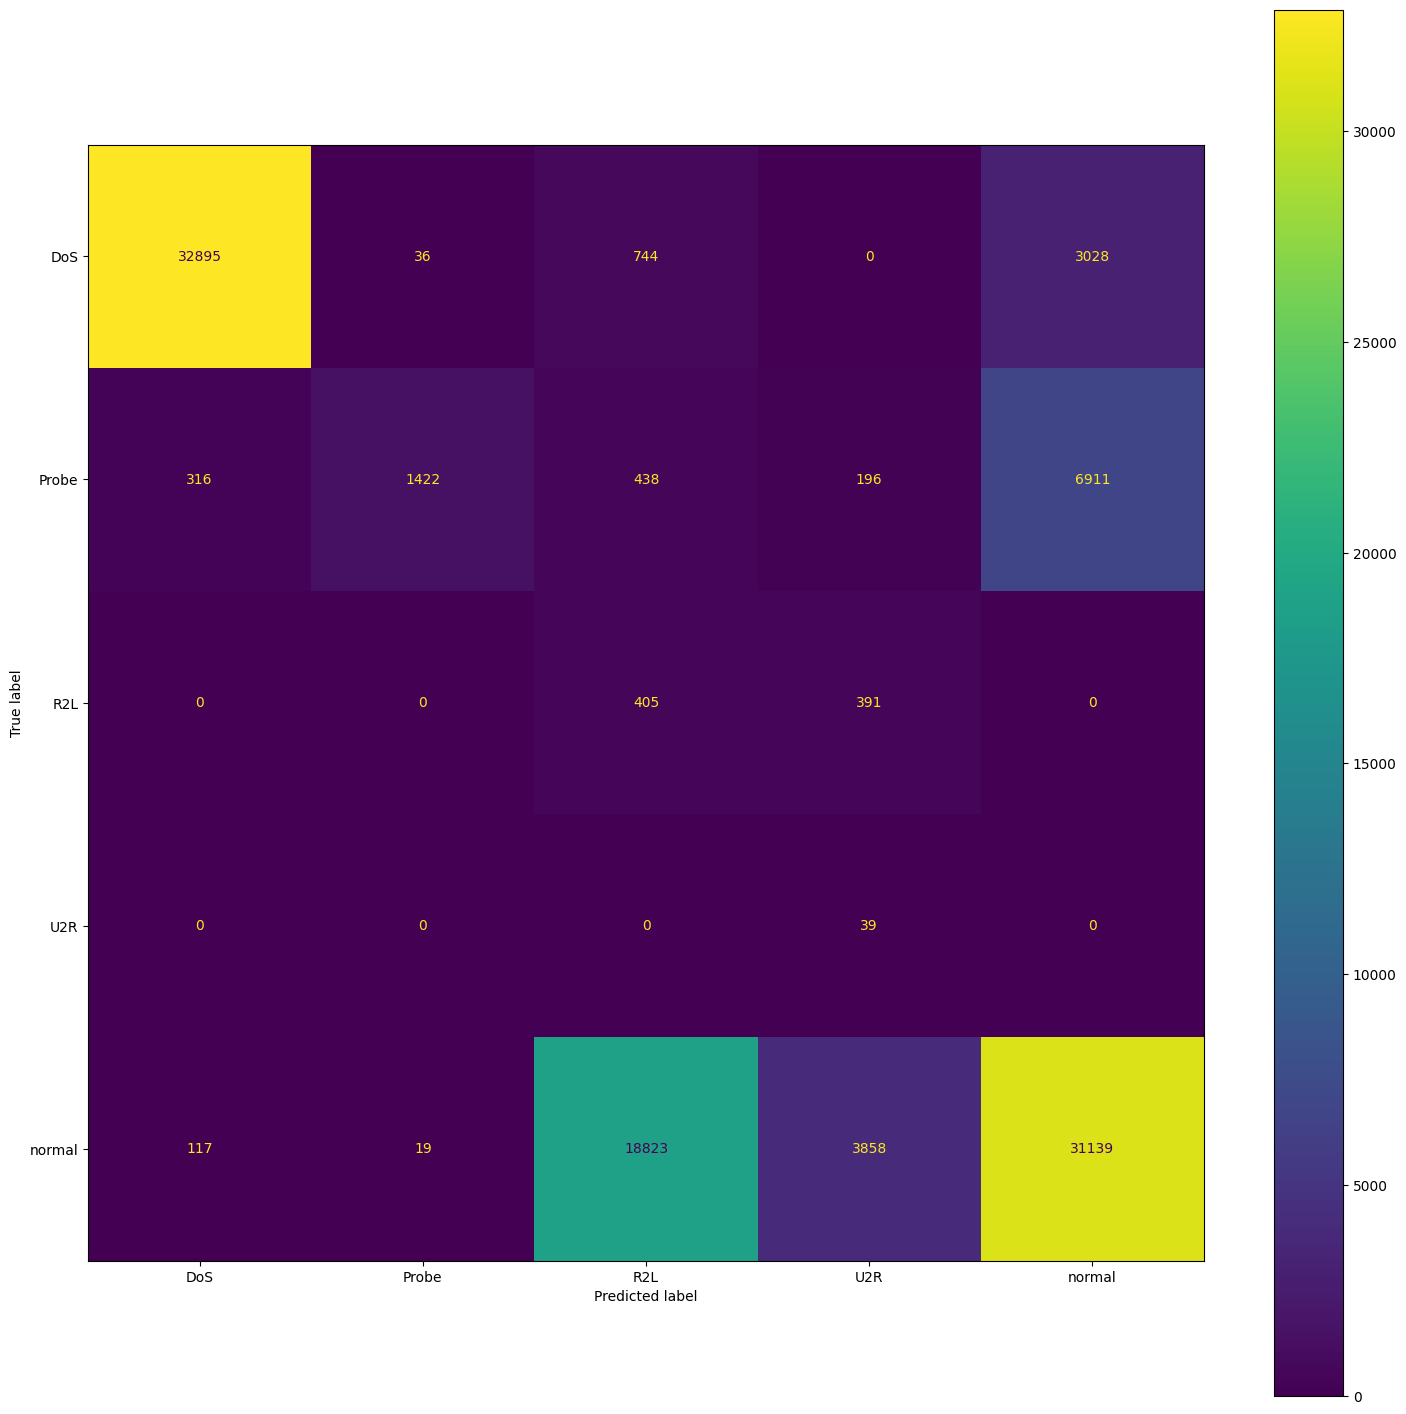

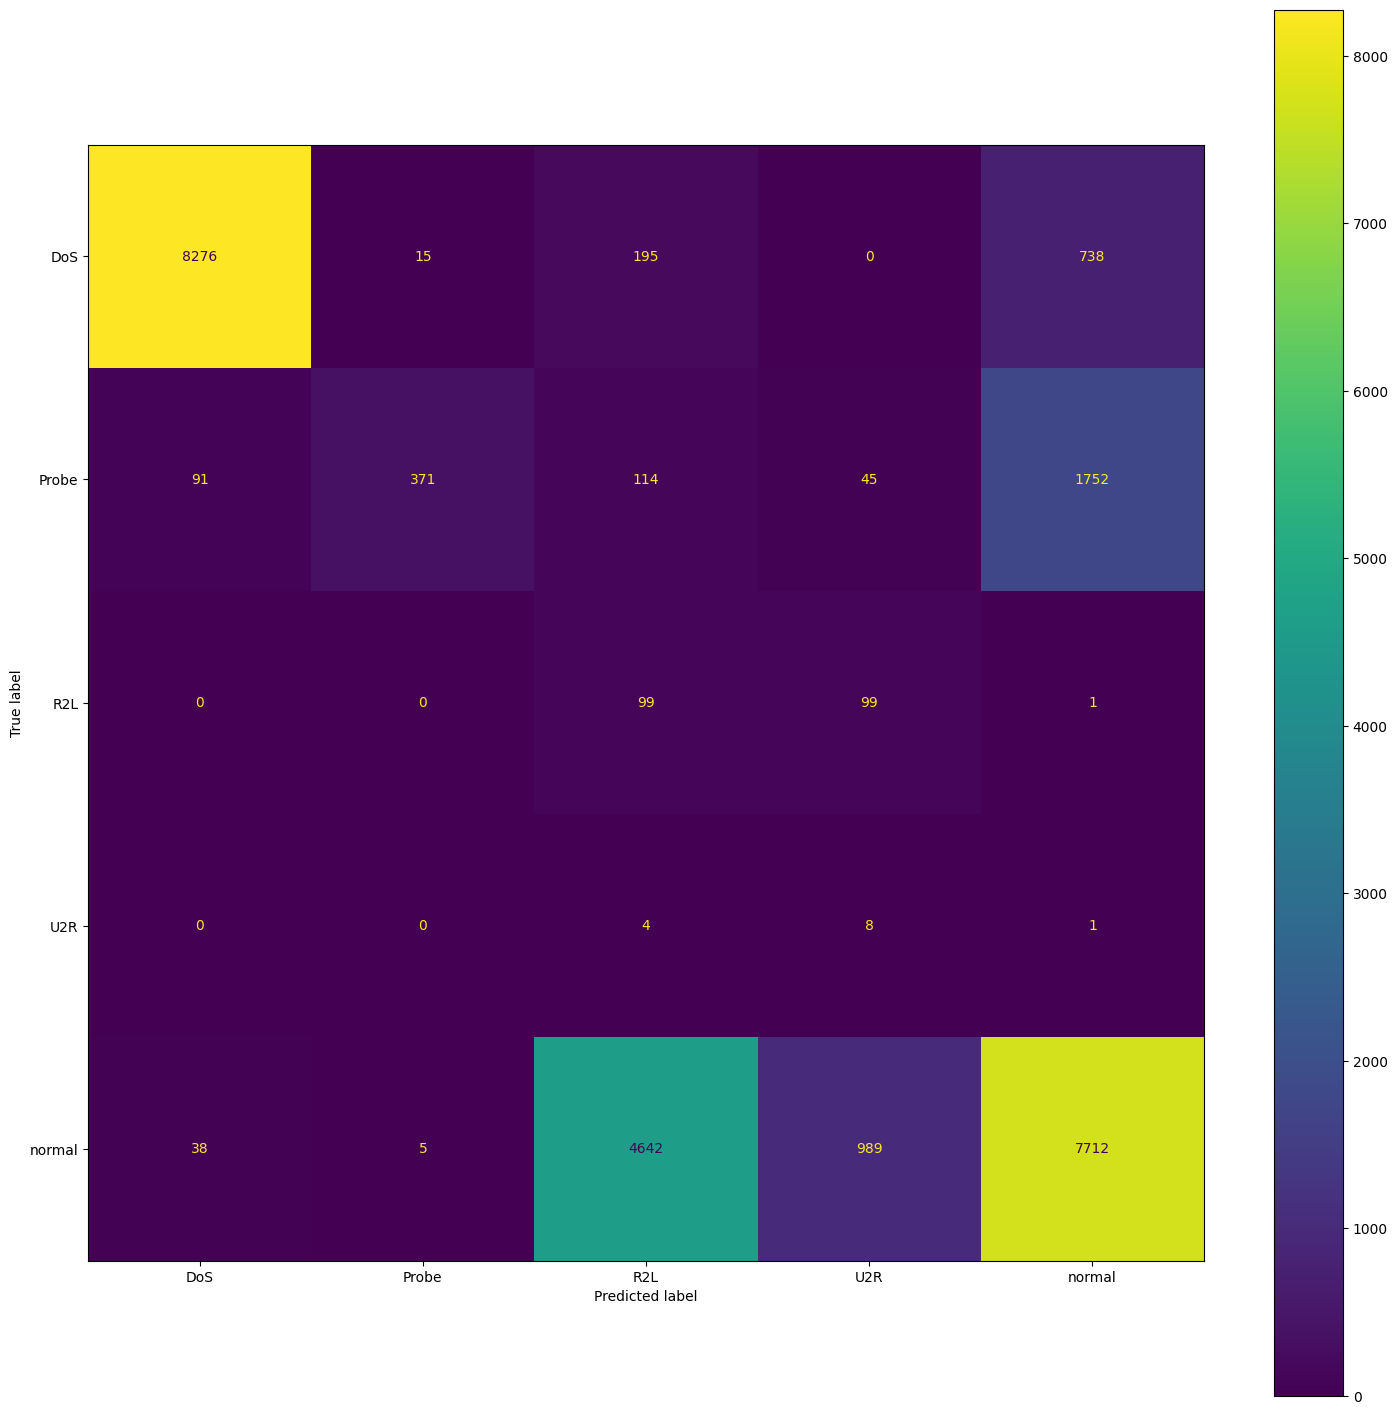

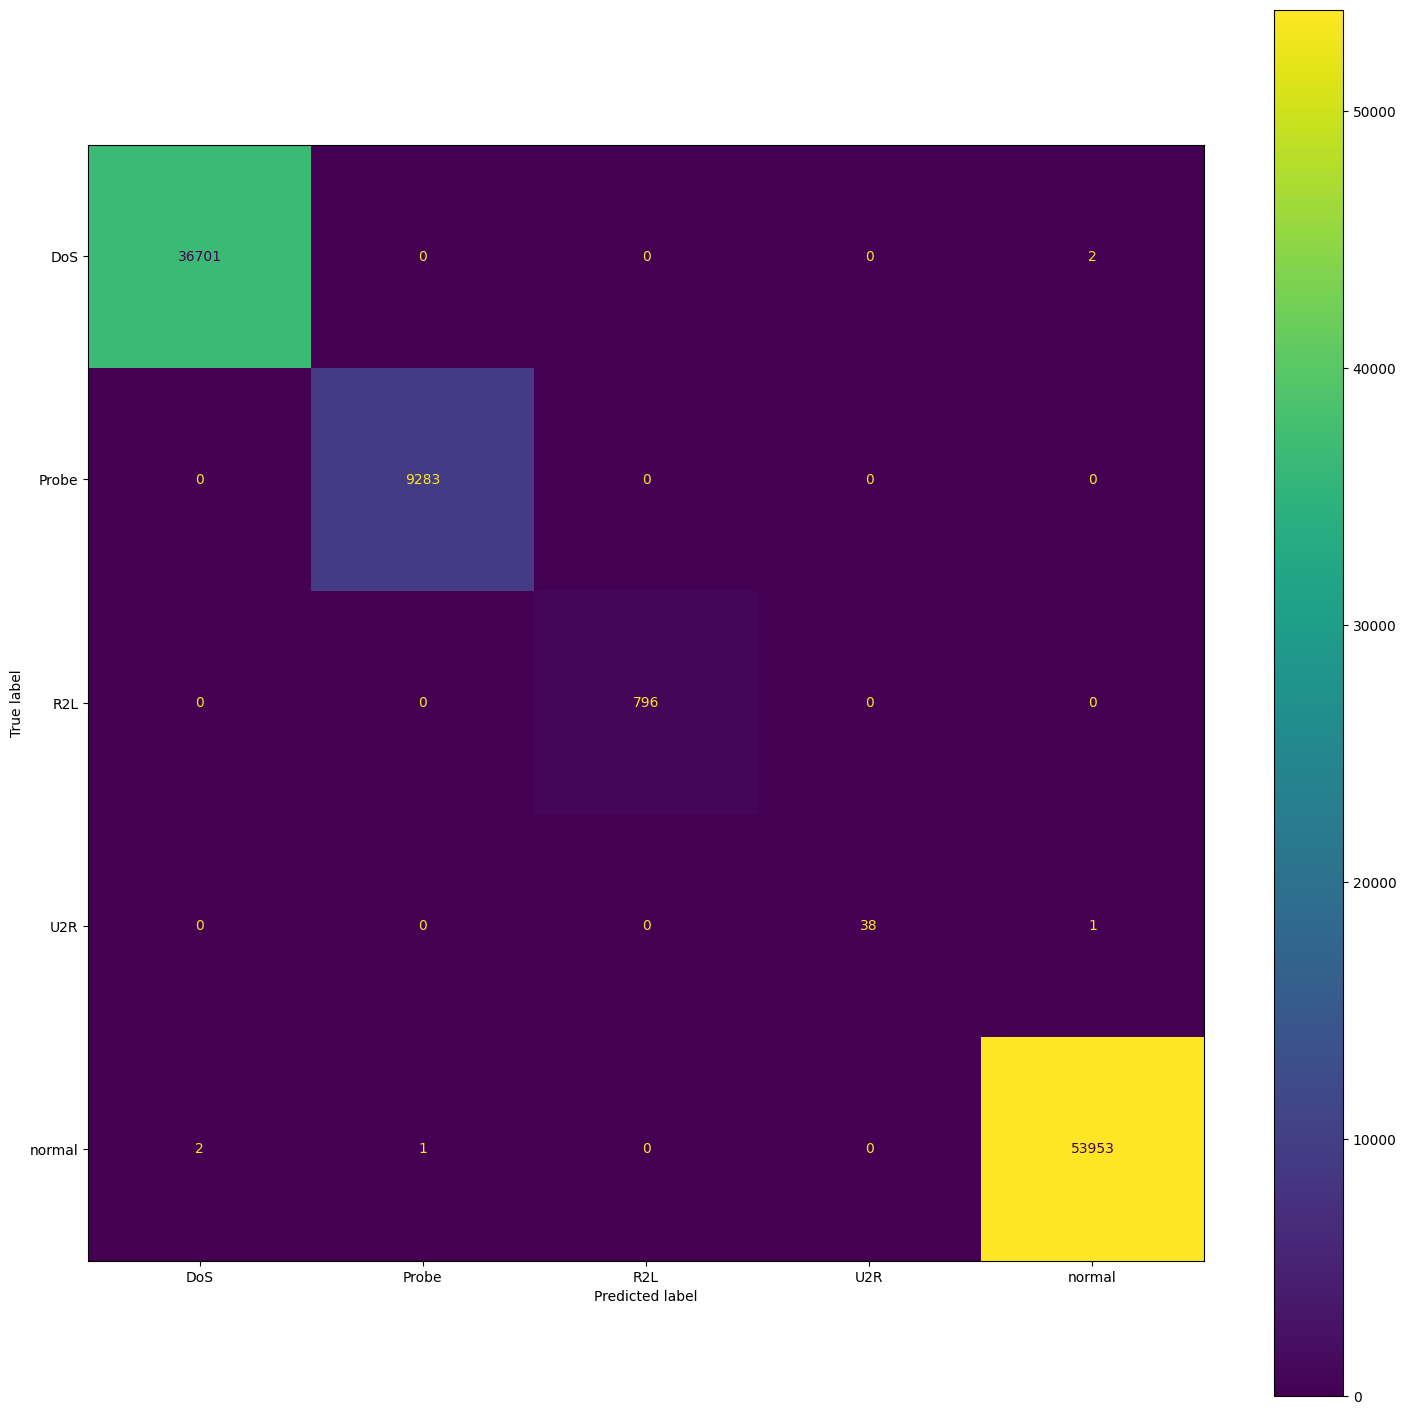

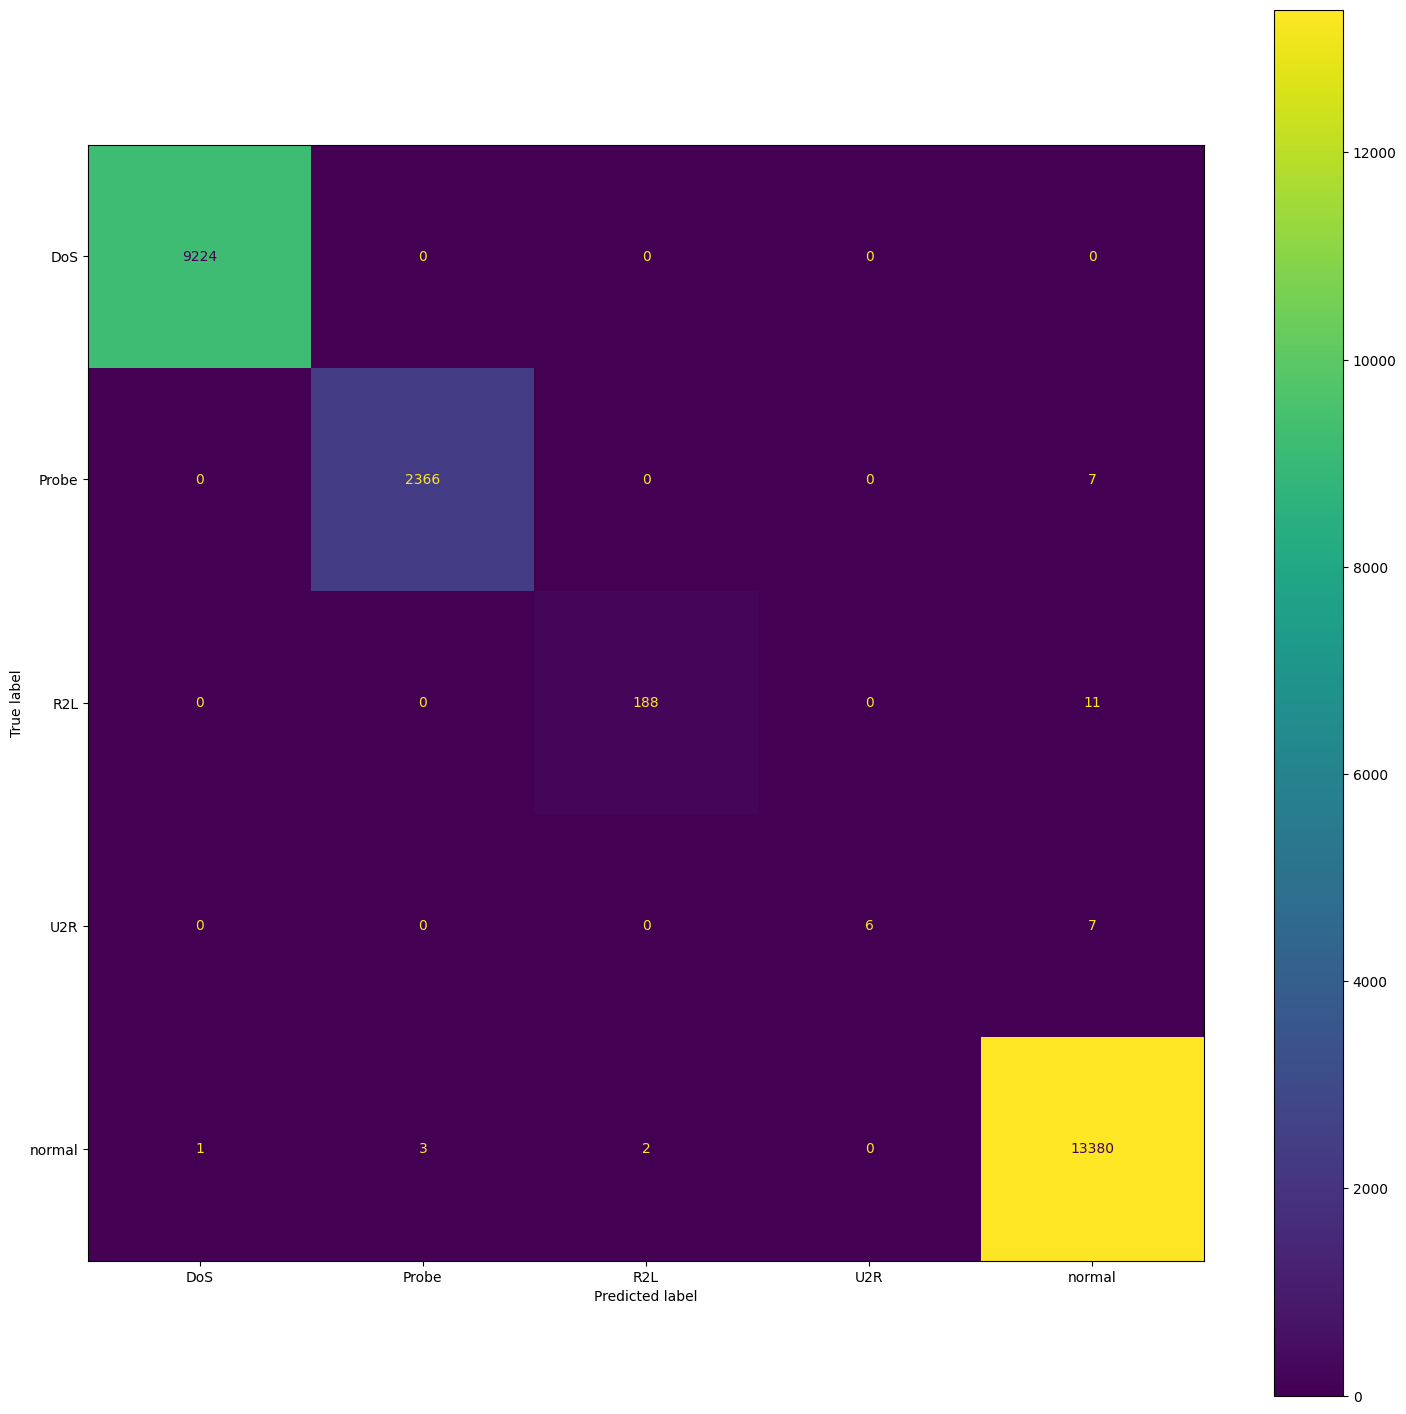

In [314]:
nb_model = GaussianNB()
nb_model.fit(x, y)
rf_model = RandomForestClassifier()
rf_model.fit(x, y)

accuracy, precision, recall, accuracy_test, precision_test, recall_test,confusion , confusion_test = evaluate_model(nb_model, x, y,x_test,y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = nb_model.classes_)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix = confusion_test, display_labels = nb_model.classes_)
fig, ax = plt.subplots(figsize=(18,18))
fig_test, ax_test = plt.subplots(figsize=(18,18))
ax.grid(False)
ax_test.grid(False)

cm_display.plot(ax=ax)
cm_display_test.plot(ax=ax_test)

ax.set_title('Confusion Matrix (Train - Naive Bayes)')
ax_test.set_title('Confusion Matrix (Test - Naive Bayes)')

accuracy_rf, precision_rf, recall_rf, accuracy_test_rf, precision_test_rf, recall_test_rf,confusion_rf , confusion_test_rf = evaluate_model(rf_model, x, y,x_test,y_test)
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix = confusion_rf, display_labels = rf_model.classes_)
cm_display_test_rf = ConfusionMatrixDisplay(confusion_matrix = confusion_test_rf, display_labels = rf_model.classes_)
fig_rf, ax_rf = plt.subplots(figsize=(18,18))
fig_test_rf, ax_test_rf = plt.subplots(figsize=(18,18))
ax_rf.grid(False)
ax_test_rf.grid(False)

cm_display_rf.plot(ax=ax_rf)
cm_display_test_rf.plot(ax=ax_test_rf)
ax_rf.set_title('Confusion Matrix (Train - Random Forest)')
ax_test_rf.set_title('Confusion Matrix (Test - Random Forest)')
plt.show()